<a href="https://colab.research.google.com/github/juancmq/stats2023/blob/main/Juan_Monsalve_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb # this is the main code needed in order to bring different sets so the whole code can run

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [ ]:
url = "https://docs.google.com/presentation/d/1nCO0ChaEy73jRMBro3dhvGYOm7xKkqXN_A8BHSCcKEY/edit#slide=id.g1af9282345a_0_159" # this is where we enter our images that we choose to differentiate between

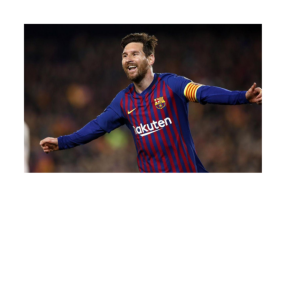

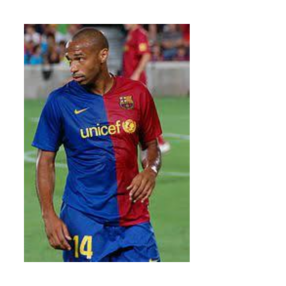

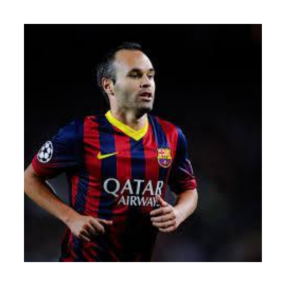

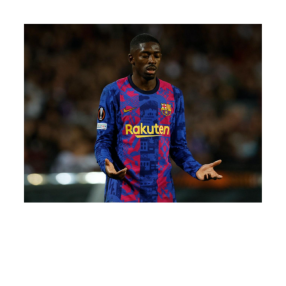

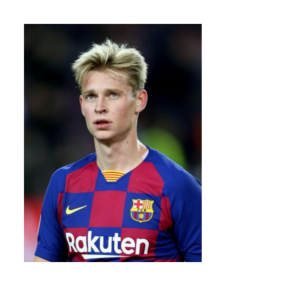

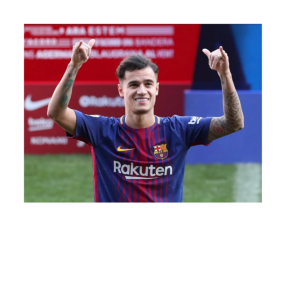

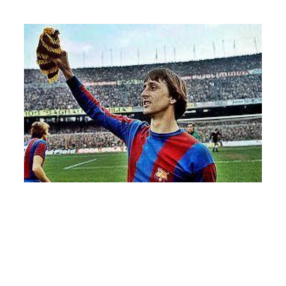

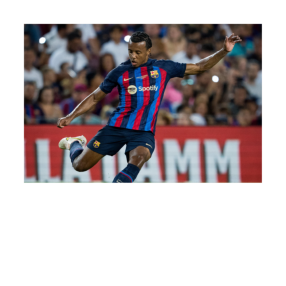

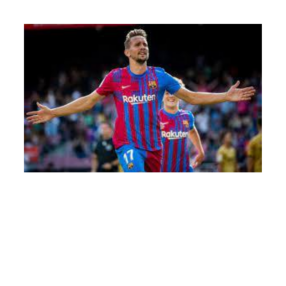

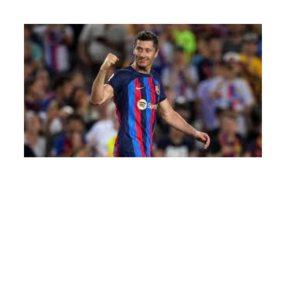

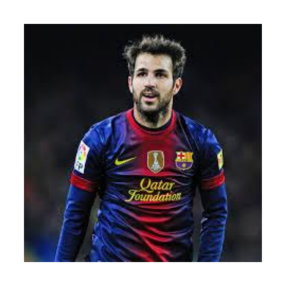

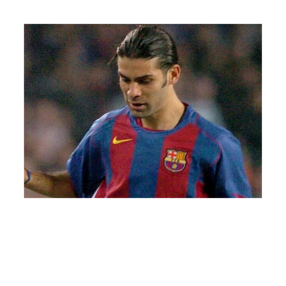

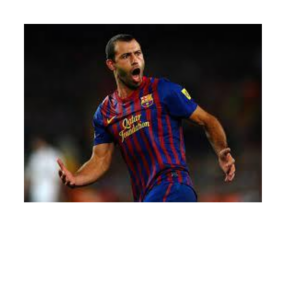

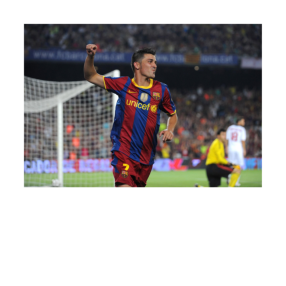

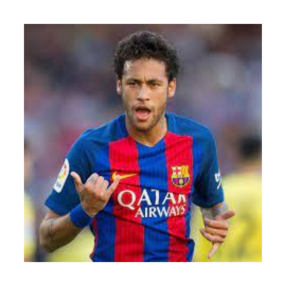

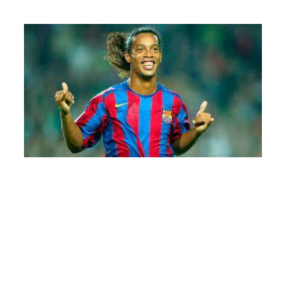

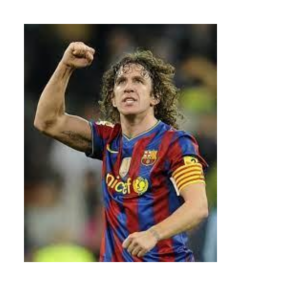

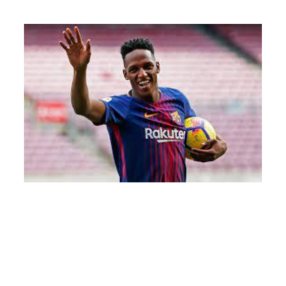

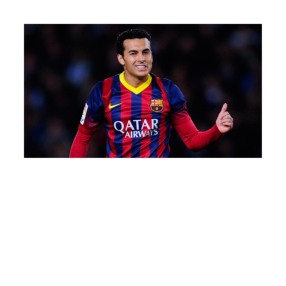

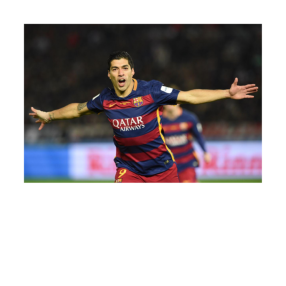

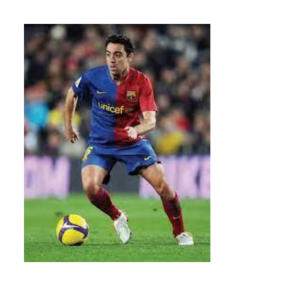

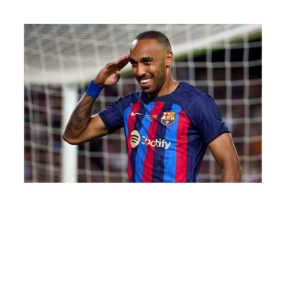

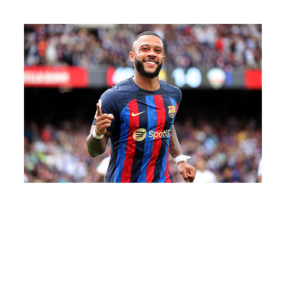

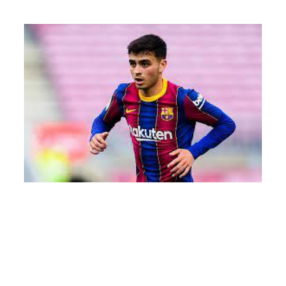

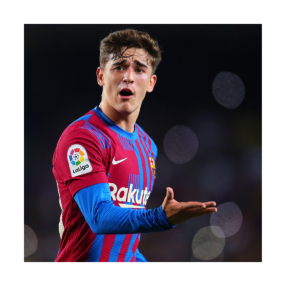

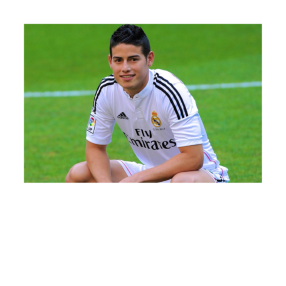

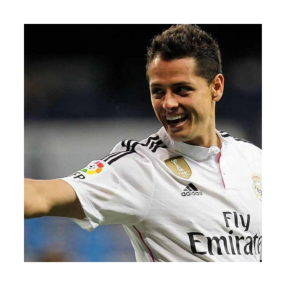

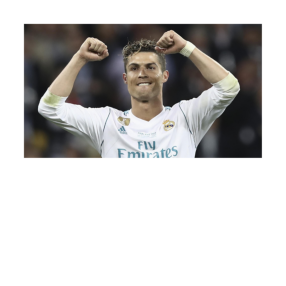

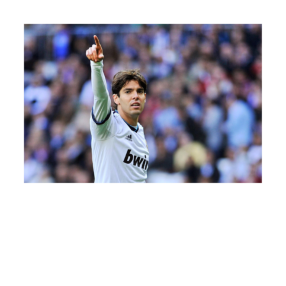

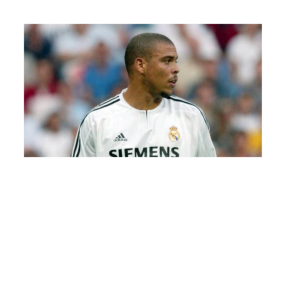

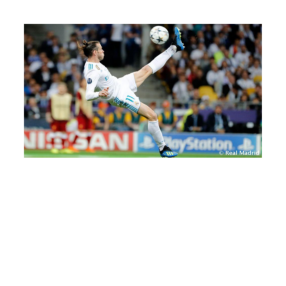

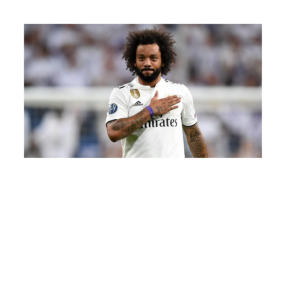

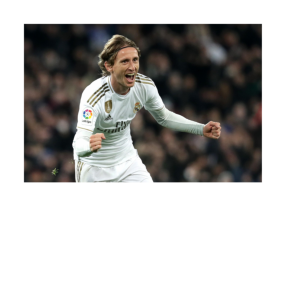

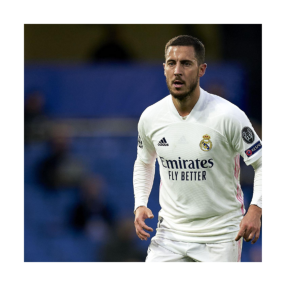

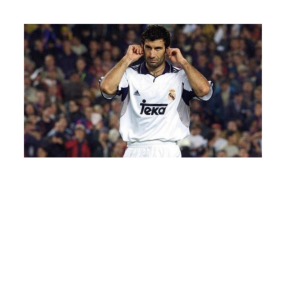

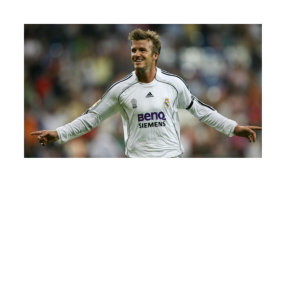

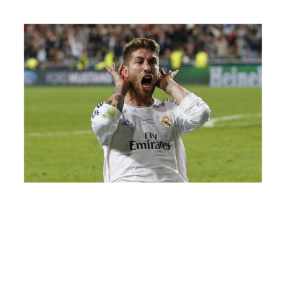

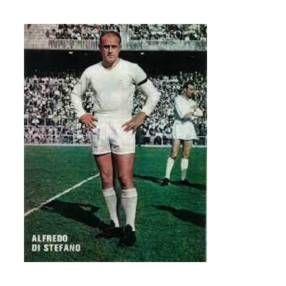

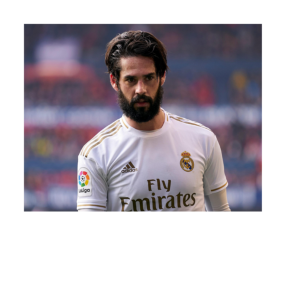

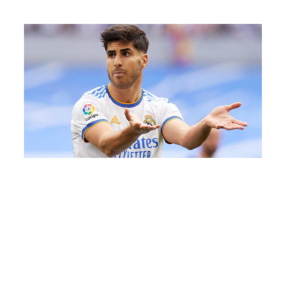

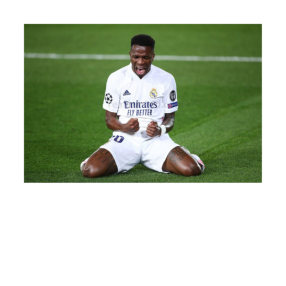

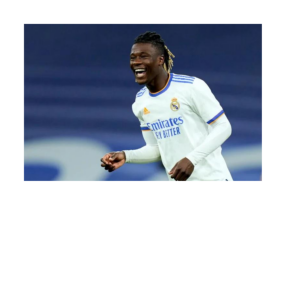

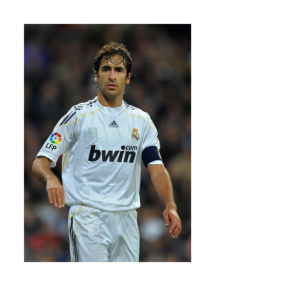

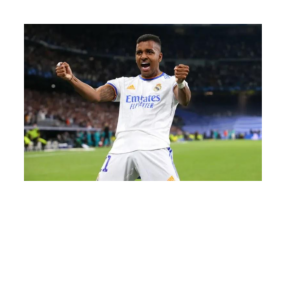

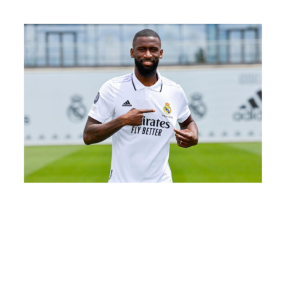

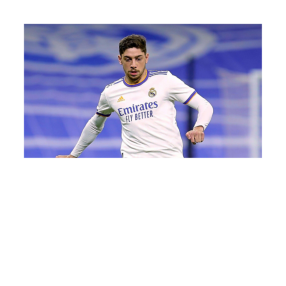

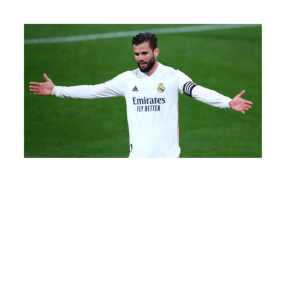

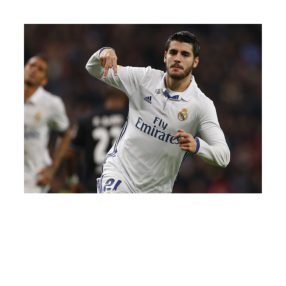

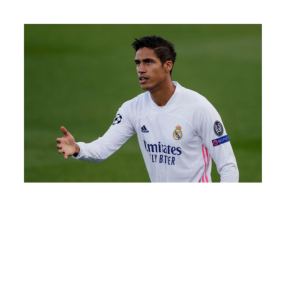

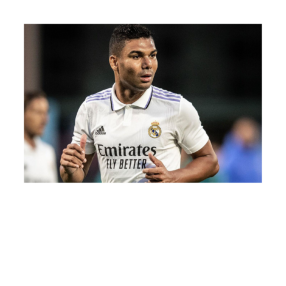

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images) # this will disaplay all the images we have in our slides

In [ ]:
images.shape # this tells us information about the images we have in our slides

torch.Size([50, 3, 224, 224])

In [ ]:
model(images)

tensor([[-3.1933, -4.2253, -2.1785,  ..., -4.2501,  0.2243,  1.6476],
        [ 1.1320, -0.4667,  1.4775,  ..., -3.4255,  2.0389,  0.2983],
        [ 1.2375, -1.5101, -3.3576,  ..., -1.7979,  0.4567,  1.4967],
        ...,
        [-3.4844, -3.0540, -3.2146,  ..., -4.7116,  0.6332,  4.7215],
        [-1.0691, -2.2571, -2.5547,  ..., -4.2936,  0.7294,  5.3305],
        [-0.9636, -4.9219, -2.4300,  ..., -4.8010, -1.6772,  4.9436]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [39]:
for i in list(guesses):
    print(labels[i]) #these are the guesses from the computer for the images in the slides

academic gown, academic robe, judge's robe
punching bag, punch bag, punching ball, punchball
racket, racquet
kimono
Windsor tie
web site, website, internet site, site
web site, website, internet site, site
ski
web site, website, internet site, site
web site, website, internet site, site
kimono
ping-pong ball
web site, website, internet site, site
web site, website, internet site, site
ping-pong ball
web site, website, internet site, site
maillot, tank suit
web site, website, internet site, site
web site, website, internet site, site
web site, website, internet site, site
soccer ball
web site, website, internet site, site
web site, website, internet site, site
web site, website, internet site, site
ping-pong ball
notebook, notebook computer
lab coat, laboratory coat
balance beam, beam
web site, website, internet site, site
web site, website, internet site, site
web site, website, internet site, site
horizontal bar, high bar
horizontal bar, high bar
racket, racquet
Cardigan, Cardigan Wel

In [40]:
Y = np.zeros(50,)
Y[25:] = 1

In [41]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
X = y.detach().cpu().numpy() 

In [43]:
X.shape

(32,)

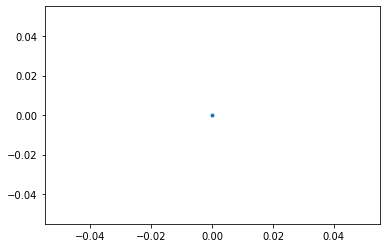

In [45]:
plt.plot(X[0],'.') #this plots some of the spreads of the images 

In [46]:
X[0]

0.0

In [47]:
np.argmax(X[0])

0

In [48]:
labels[948] # this give us one of the labels assigned to one of the images

'Granny Smith'

In [49]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [50]:
for i in top_ten:
    print(labels[i]) # these are more labels given for the images

tench, Tinca tinca


In [51]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5],
       dtype=float32),
 <a list of 10 Patch objects>)

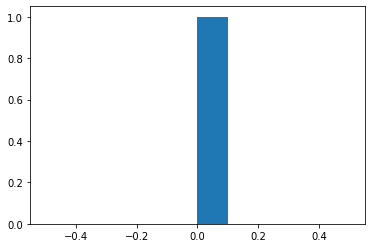

In [52]:
plt.hist(X[0]) # this plots more information about the images

In [53]:
X = GPU_data(X)
Y = GPU_data(Y)

In [54]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [55]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [56]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [57]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [58]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [59]:
X.shape

torch.Size([32])

In [60]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [61]:
def model(x,w):

    return x@w[0]

In [62]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots() # this is able to give us information about our guesses and it graphs them out in another website


wandb: Currently logged in as: juanmonsalve. Use `wandb login --relogin` to force relogin


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

*   Best Run = clean-pond-5 (0.9401)
*   Worst Run = fragrant-gorge-7 (0.4789)
*   Average = 0.6432

1.   clean-pond-5 = 0.9401
2.   jolly-lake-6 = 0.5105
3.   fragrant-gorge-7 = 0.4789

